# Neural Network Modeling and hyperparameter tuning




In [2]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings(action='once')

In [3]:
df = pd.read_csv('/Users/ej7793/Documents/FlightDelay/Data/feature_engineered.csv')

In [4]:
df.describe()

,Saturday,Tuesday_Wednesday,CARRIER_rank,ORIGIN_rank,DEST_rank,LATE_NIGHT,DEP_HOUR_rank,DEP_DEL15,ARR_DEL15
count,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000
mean,0.106010,0.287562,6.354168,3.474976,3.052632,0.038092,3.283166,0.135917,0.137317
std,0.307851,0.452626,4.872752,2.177318,2.288243,0.191418,2.106907,0.342700,0.344182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,0.000000,1.000000,10.000000,5.000000,4.000000,0.000000,5.000000,0.000000,0.000000
max,1.000000,1.000000,16.000000,9.000000,9.000000,1.000000,9.000000,1.000000,1.000000


In [5]:
df.dtypes

Saturday               int64
Tuesday_Wednesday      int64
CARRIER_rank           int64
ORIGIN_rank          float64
DEST_rank            float64
LATE_NIGHT             int64
DEP_HOUR_rank          int64
DEP_DEL15            float64
ARR_DEL15            float64
dtype: object

In [6]:
df.columns

Index(['Saturday', 'Tuesday_Wednesday', 'CARRIER_rank', 'ORIGIN_rank',
       'DEST_rank', 'LATE_NIGHT', 'DEP_HOUR_rank', 'DEP_DEL15', 'ARR_DEL15'],
      dtype='object')

In [7]:
df = df.sample(100000)

X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
64000
records in validation dataset
16000
records in final testing dataset
20000


In [8]:
predictors = ['Saturday', 'Tuesday_Wednesday', 'CARRIER_rank', 'ORIGIN_rank',
       'DEST_rank', 'LATE_NIGHT', 'DEP_HOUR_rank', 'DEP_DEL15']
target = 'ARR_DEL15'


In [83]:
def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred


In [10]:
X_test.ARR_DEL15.value_counts(normalize =True)

0.0    0.859938
1.0    0.140063
Name: ARR_DEL15, dtype: float64

## Helper functions

In [11]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [12]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Modeling

In [73]:

X = X_train[predictors]
y = X_train[target]

## Neural Network

**Baseline Model**

In [14]:
## better f1 score to begin with 
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9328
Precision on Train Data: 0.7655
Recall on Train Data: 0.7419
F1 score on Train Data: 0.7535
CV Score : Mean - 0.7526 | Std - 0.00712 | Min - 0.7432 | Max - 0.7636
Accuracy on Test Data: 0.9303
Precision on Test Data: 0.7481
Recall on Test Data: 0.7568
F1 score on Test Data: 0.7524
Time:  88.72239509300002


**Learning curve**

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optim

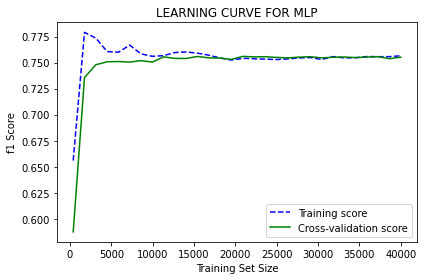

In [16]:
plot_learning_curve(mlp, X, y, 'f1', 'MLP')

In [25]:
params = mlp.get_params()
print(params)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


**Validation curve**

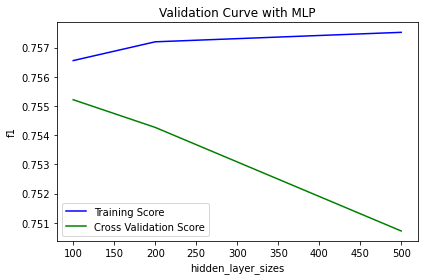

In [27]:
##number of nodes
parameter_range=[(100,),(200,),(500,)]
plot_validation_curve(mlp ,X, y, "hidden_layer_sizes", parameter_range, "f1", 'MLP')

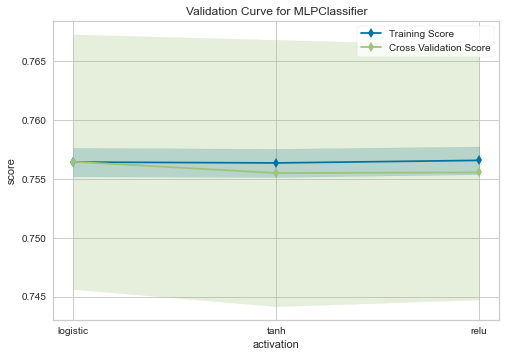

<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='activation', ylabel='score'>

In [48]:
##activation function
##logistic highest
from yellowbrick.model_selection import ValidationCurve


viz = ValidationCurve(
    mlp, param_name="activation",
    param_range=['logistic', 'tanh', 'relu'], cv=10, scoring="f1"
)
viz.fit(X, y)
viz.show()

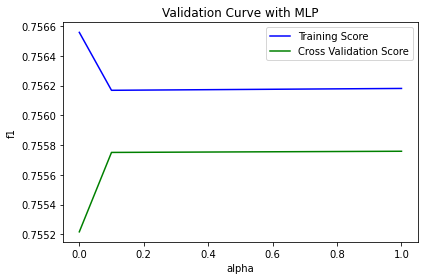

In [33]:
##regularization
## choose alpha = 0.1
parameter_range = [0.0001, 0.1, 1]
plot_validation_curve(mlp ,X, y, "alpha", parameter_range, "f1", 'MLP')

In [49]:
## number of hidden layers
param_grid = {
              'hidden_layer_sizes': [(100,100, 50), (100,100), (100,)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='f1', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [(100, 100, 50), (100, 100),
                                                (100,)]},
             return_train_score=True, scoring='f1')

In [78]:
print(grid_lr.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (100,)}


**ROC curve without hyperparamter tuning**

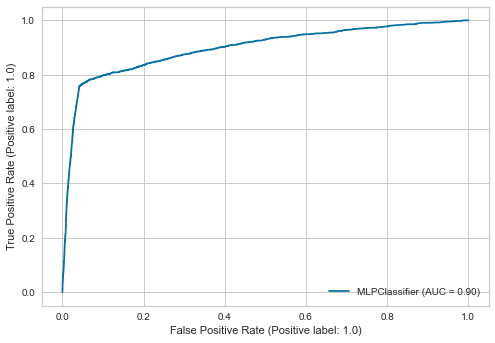

In [79]:
## ROC curve
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

plot_roc_curve(mlp, X_test[predictors], X_test[target])

**Grid search for best hyperparameter set**

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'alpha': [0.0001, 0.1],
              'hidden_layer_sizes': [(100,100, 50),(100,100), (100,)]}
grid_lr = GridSearchCV(estimator =mlp, param_grid= param_grid, scoring='f1', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X,y)

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'alpha': [0.0001, 0.1],
                         'hidden_layer_sizes': [(100, 100, 50), (100, 100),
                                                (100,)]},
             return_train_score=True, scoring='f1')

In [77]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

print(grid_lr.get_params())

MLPClassifier(alpha=0.1, random_state=1)
{'alpha': 0.1, 'hidden_layer_sizes': (100,)}
{'cv': None, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 1, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'alpha': [0.0001, 0.1], 'hidden_layer_sizes': [(100, 100, 50), (100, 100)

**New model after hyperparameter tuning**

In [80]:
mlp_tuned = grid_lr.best_estimator_
mlp_tuned.get_params()
##MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100), random_state=1)

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [84]:
y_pred=modelfit(mlp_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9327
Precision on Train Data: 0.7662
Recall on Train Data: 0.7397
F1 score on Train Data: 0.7527
CV Score : Mean - 0.7651 | Std - 0.008684 | Min - 0.7509 | Max - 0.7732
Accuracy on Test Data: 0.9301
Precision on Test Data: 0.7481
Recall on Test Data: 0.7555
F1 score on Test Data: 0.7518
Total Time:  44.367964117001975
training time:  0.08338001101219561
testing time:  0.027561502996832132


In [65]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [85]:
## compare with before hyper parameter tuning 
mlp = MLPClassifier(random_state=1)
y_pred=modelfit(mlp, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9328
Precision on Train Data: 0.7655
Recall on Train Data: 0.7419
F1 score on Train Data: 0.7535
CV Score : Mean - 0.766 | Std - 0.008764 | Min - 0.7517 | Max - 0.7752
Accuracy on Test Data: 0.9303
Precision on Test Data: 0.7481
Recall on Test Data: 0.7568
F1 score on Test Data: 0.7524
Total Time:  75.26655828699586
training time:  0.09449753099761438
testing time:  0.0319712609925773


No handles with labels found to put in legend.


[0.3110858242362169, 0.223702367221792, 0.2225296506971554, 0.22145483589778062, 0.2216066365151106, 0.22131230578750843, 0.22109238369378306, 0.22098162634313442, 0.22040036770524457, 0.22042671038746325, 0.22079849375268668, 0.2203872667245209, 0.22019034933183834, 0.2201468755182004, 0.2203769400573536, 0.21972410702387077, 0.22055616407071887, 0.22012149383669702, 0.22000503193044282, 0.2193369351790141, 0.2197210587251774, 0.21949890864861596, 0.21925416299405232, 0.2193854932974307, 0.22010004946039474, 0.21996566798702208, 0.21981079347959412, 0.219374858497478, 0.21939362208503763, 0.21946878194467714, 0.21920733660595673]


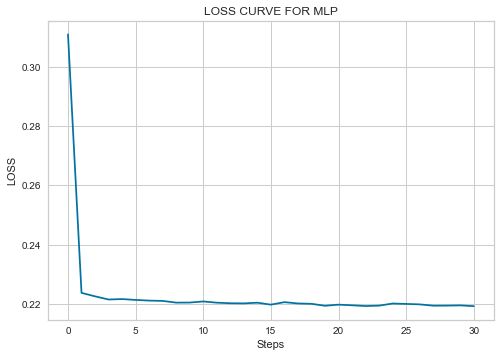

In [88]:
test_acc = metrics.precision_score(X_test[target], y_pred) * 100.
loss_values = mlp_tuned.loss_curve_
print (loss_values)
plt.plot(loss_values)
plt.title("LOSS CURVE FOR %s" % 'MLP')
plt.xlabel("Steps"), plt.ylabel('LOSS'), plt.legend(loc="best")
plt.show()

**ROC curve after hyper parameter tuning**

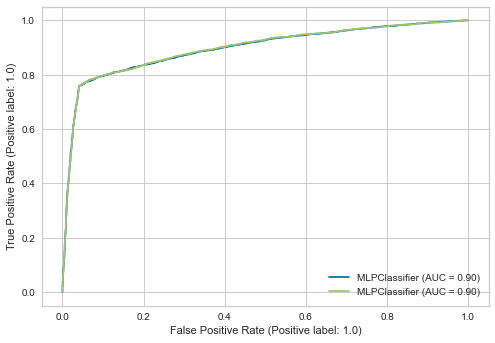

In [60]:
disp = plot_roc_curve(mlp_tuned, X_test[predictors], X_test[target])
plot_roc_curve(mlp,X_test[predictors], X_test[target], ax= disp.ax_);

**Learning curve after hyper parameter tuning** 

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/ej

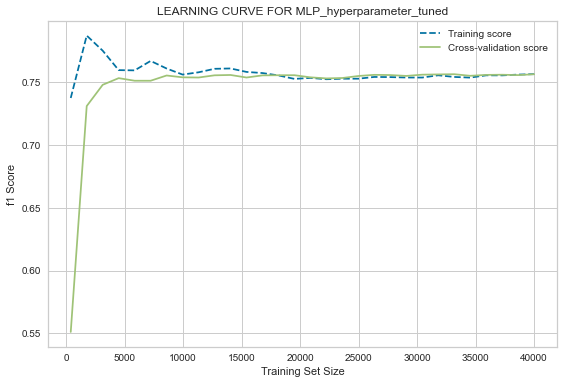

/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ej7793/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optim

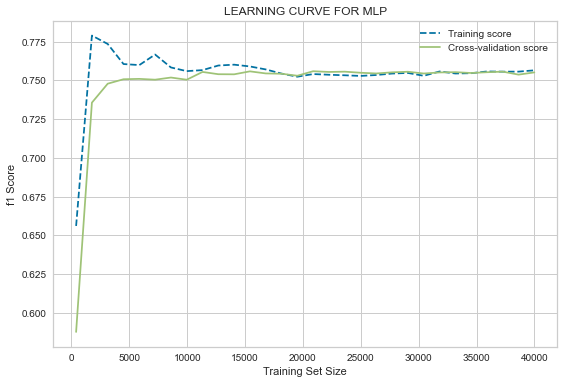

In [59]:
disp = plot_learning_curve(mlp_tuned, X, y, 'f1', 'MLP_hyperparameter_tuned')
plot_learning_curve(mlp, X, y, 'f1', 'MLP');

## Final prediction results and performance 

In [91]:
y_pred=modelfit(mlp_tuned, X_train, X_final_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9327
Precision on Train Data: 0.7662
Recall on Train Data: 0.7397
F1 score on Train Data: 0.7527
CV Score : Mean - 0.7651 | Std - 0.008684 | Min - 0.7509 | Max - 0.7732
Accuracy on Test Data: 0.9327
Precision on Test Data: 0.762
Recall on Test Data: 0.7365
F1 score on Test Data: 0.749
Total Time:  43.16511138698843
training time:  0.08498673400026746
testing time:  0.045601660007378086
